In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
import seaborn as sns
#import plotly as pl
import datetime as dt
import re
sns.set_style('darkgrid')
%matplotlib inline
py.style.use('ggplot')
np.random.seed(42)

In [170]:
#df=pd.read_json('ultimate_data_challenge.json',lines='False')
import json
with open('ultimate_data_challenge.json', 'r') as datafile:
    data = json.load(datafile)
    df = pd.DataFrame(data)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [172]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [173]:
df2=df.dropna(subset=['avg_rating_of_driver','avg_rating_by_driver','phone'])

In [174]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
city                      41445 non-null object
last_trip_date            41445 non-null object
phone                     41445 non-null object
signup_date               41445 non-null object
surge_pct                 41445 non-null float64
trips_in_first_30_days    41445 non-null int64
ultimate_black_user       41445 non-null bool
weekday_pct               41445 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.8+ MB


In [175]:
df2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [176]:
df2['6monret']=pd.DatetimeIndex(df2['last_trip_date'])


C:\Users\hasan.rizvi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [177]:
rettime=df2['6monret'].max()-pd.to_timedelta([30], unit='d')

In [178]:
df2['ret3']=df2['6monret'].apply(lambda x: 1 if x >= rettime else 0)


C:\Users\hasan.rizvi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [179]:
df3=df2.drop(['signup_date','6monret','last_trip_date'],axis=1)

In [180]:
df3

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,ret3
0,3.67,5.0,4.7,1.10,King's Landing,iPhone,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,Android,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,iPhone,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,iPhone,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,Android,11.8,14,False,82.4,0
5,10.56,5.0,3.5,1.00,Winterfell,iPhone,0.0,2,True,100.0,1
7,2.04,5.0,5.0,1.00,Winterfell,iPhone,0.0,2,False,100.0,0
8,4.36,5.0,4.5,1.00,Winterfell,Android,0.0,2,False,100.0,0
10,4.28,4.9,5.0,1.00,Winterfell,iPhone,0.0,1,True,100.0,0
11,3.81,5.0,4.0,1.00,Winterfell,iPhone,0.0,3,False,100.0,0


In [181]:
dftarg=df3['ret3']

In [182]:
dfdata=df3.drop('ret3',axis=1)

In [183]:
df4=pd.get_dummies(dfdata)

colist=['surge_pct','avg_dist']

for i in colist:
    df4[i]=(df4[i]-df4[i].mean())/df[i].std()

In [187]:
df4['ultimate_black_user']=df4['ultimate_black_user'].apply(lambda x: 1 if x== True else 0)
df4

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,3.67,5.0,4.7,1.10,15.4,4,1,46.2,0,1,0,0,1
1,8.26,5.0,5.0,1.00,0.0,0,0,50.0,1,0,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,0,100.0,1,0,0,0,1
3,2.36,4.9,4.6,1.14,20.0,9,1,80.0,0,1,0,0,1
4,3.13,4.9,4.4,1.19,11.8,14,0,82.4,0,0,1,1,0
5,10.56,5.0,3.5,1.00,0.0,2,1,100.0,0,0,1,0,1
7,2.04,5.0,5.0,1.00,0.0,2,0,100.0,0,0,1,0,1
8,4.36,5.0,4.5,1.00,0.0,2,0,100.0,0,0,1,1,0
10,4.28,4.9,5.0,1.00,0.0,1,1,100.0,0,0,1,0,1
11,3.81,5.0,4.0,1.00,0.0,3,0,100.0,0,0,1,0,1


In [189]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.preprocessing import scale
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

#Split train and test data
X_train, X_test, y_train, y_test = train_test_split(df4, dftarg)

In [190]:
# Apply logistic regression and print scores
lr = LogisticRegression()


lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

y_pred = lr.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\hasan.rizvi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7035678666795354
0.708936498745416
[[4989 1083]
 [1933 2357]]
              precision    recall  f1-score   support

           0       0.72      0.82      0.77      6072
           1       0.69      0.55      0.61      4290

    accuracy                           0.71     10362
   macro avg       0.70      0.69      0.69     10362
weighted avg       0.71      0.71      0.70     10362



In [191]:
coefs = lr.coef_

No handles with labels found to put in legend.


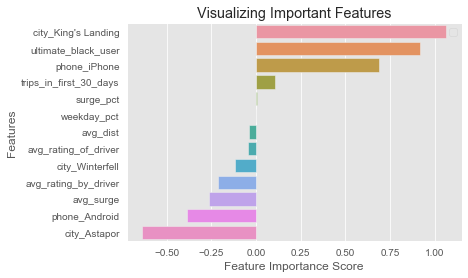

In [193]:
feature_imp = pd.Series(coefs[0],index=df4.columns).sort_values(ascending=False)
# Creating a bar plot
sns.barplot(x=feature_imp[0:20], y=feature_imp.index[0:20])
# Add labels to your graph
py.xlabel('Feature Importance Score')
py.ylabel('Features')
py.title("Visualizing Important Features")
py.legend()
py.show()